In [65]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rnd

# Parámetros iniciales
T_cafe_inicial = 80  # Temperatura inicial del café en grados Celsius
T_leche_inicial = 5  # Temperatura inicial de la leche en grados Celsius
T_ambiente = 22      # Temperatura ambiente en grados Celsius
m_cafe = 100         # Masa del café en gramos
m_leche = 50         # Masa de la leche en gramos
c_cafe = 4.184       # Capacidad calorífica específica del café en J/g°C
c_leche = 3.866      # Capacidad calorífica específica de la leche en J/g°C
T_vaso_inicial = T_ambiente  # Temperatura inicial de los vasos
tiempo = np.linspace(0,5, 200)  # Simulación de 5 minutos

# Función para calcular la temperatura de equilibrio de la mezcla
def T_Rich(T_1, T_2, m_1, m_2, c_1, c_2):
    return (m_1 * c_1 * T_1 + m_2 * c_2 * T_2) / (m_1 * c_1 + m_2 * c_2)

# Función para el enfriamiento de Newton
def Nwt_cooling(T_l, T_a, t, tau = -0.1):
    return T_a + (T_l - T_a) * np.exp(tau * t)


m_cafe_a = np.linspace(0,m_cafe, 10)
m_leche_a = np.linspace(0,m_leche, 10)


def cambio_entropia(m, c, T_i, T_f):
    T_i_K = T_i + 273.15  # Convertir a Kelvin
    T_f_K = T_f + 273.15  # Convertir a Kelvin
    
    delta_S = m * c * math.log(T_f_K / T_i_K)
    return delta_S

#datos medidos 2 veces por cada mezcla
exp_time = [20,70,120,170,220,270,320,370,420,470,520]
exp_T    = [68,64,60,58,56,55,54,52,51,48,47]


for t in range(len(exp_time)):
    exp_time[t] = (exp_time[t]-20 )/60 

exp_T_leche = []

for t in range(len(exp_time)//7):
    exp_T[t] = (exp_T[t]*1.2) + rnd.gauss(0, 0.1) - 10
    exp_T_leche.append(exp_T[t] +rnd.gauss(0, 1))

for T in exp_T[len(exp_T)//7:]:
    exp_T_leche.append(T + rnd.gauss(0, 0.7) -15)

print(len(exp_T_leche))

11


$$ \frac{d \Delta T}{dt} = \frac{\Delta T}{\tau} $$
$$ T(t) = T_{a} + (T_{0} - T_{a}) e^{\frac{t}{\tau}} $$
$$ T_{m} = \frac{m1*T1+m2*T2}{m1+m2} $$

# Vaso cafe

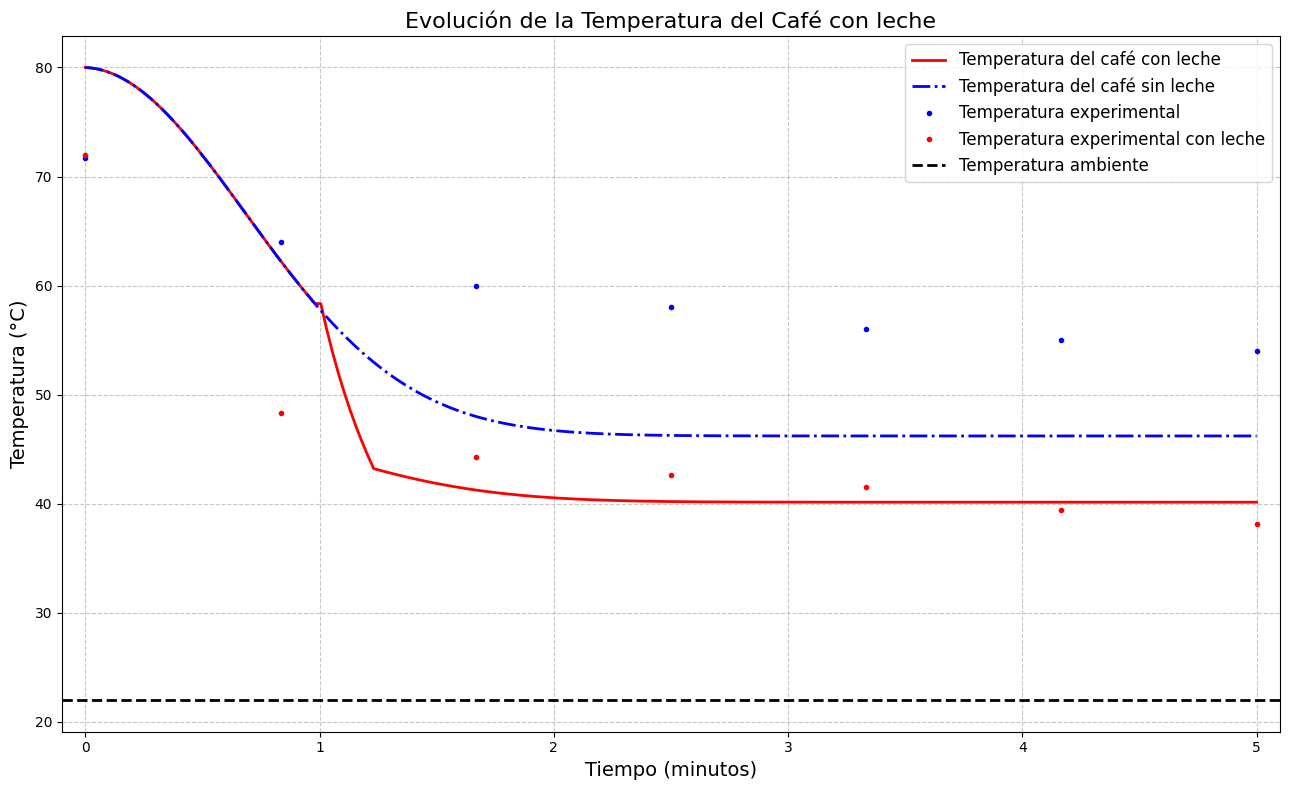

In [66]:
T_cafe = []
T_leche = []
T_mezcla_en_vaso_cafe = []
T_mezcla_en_vaso_leche = []
T_vaso_cafe = []
T_vaso_leche = []
T_vaso_cafe_o = []
T_vaso_leche_o = []
ds_cafe = []
ds_leche = []
ds_mecla_cafe = []
ds_mezcla_leche = []
ds_vaso_cafe = []
ds_vaso_leche = []
T_cafe.append(T_cafe_inicial)
T_leche.append(T_leche_inicial)
T_vaso_cafe.append(T_ambiente)
T_vaso_leche.append(T_ambiente)

# Primera etapa
for t in tiempo[1:(len(tiempo)//5)]: # Desde el minuto 0 hasta el minuto 1 el cafe y la leche estan en sus respectivos vasos
    T_cafe.append(Nwt_cooling(T_cafe[-1], T_vaso_cafe[-1], t, tau=-(1)/(33))) # El cafe intercambia temperatura con el vaso
    T_leche.append(Nwt_cooling(T_leche[-1], T_vaso_leche[-1], t, tau=-(1)/(40))) # La leche intercambia temperatura con su respectivo vaso
    T_vaso_cafe.append(Nwt_cooling(T_vaso_cafe[-1], T_cafe[-1], t, tau=-(1)/(45))) # El vaso con cafe cambia su temepratura con el cafe
    T_vaso_leche.append(Nwt_cooling(T_vaso_leche[-1], T_leche[-1], t, tau=-(1)/(45))) # El vaso con leche cambia su temperwtura con la leche
    ds_cafe.append(cambio_entropia(m_cafe, c_cafe, T_cafe_inicial, T_cafe[-1]))
    ds_leche.append(cambio_entropia(m_leche, c_leche, T_leche_inicial, T_leche[-1]))
    ds_vaso_cafe.append(cambio_entropia(m_cafe, c_cafe, T_vaso_inicial, T_vaso_cafe[-1]))
    ds_vaso_leche.append(cambio_entropia(m_leche, c_leche, T_vaso_inicial, T_vaso_leche[-1]))

# Ley de mezclas de Richman
for m_cafe in m_cafe_a:
    T_mezcla_en_vaso_leche.append(T_Rich(T_cafe[-1], T_leche[-1], m_cafe, m_leche, c_cafe, c_leche))
    ds_mezcla_leche.append(cambio_entropia(m_leche, c_leche, T_leche_inicial, T_mezcla_en_vaso_leche[-1]))

for m_leche in m_leche_a:
    T_mezcla_en_vaso_cafe.append(T_Rich(T_cafe[-1], T_leche[-1], m_cafe, m_leche, c_cafe, c_leche))
    ds_mecla_cafe.append(cambio_entropia(m_cafe, c_cafe, T_cafe_inicial, T_mezcla_en_vaso_cafe[-1]))

T_vaso_cafe_o.append(T_vaso_cafe[-1]) # Caso donde el vaso de cafe, permanece unicamente con cafe
T_vaso_leche_o.append(T_vaso_leche[-1]) # Caso donde el vaso de leche, permanece unicamente con leche
ds_vaso_cafe.append(cambio_entropia(m_cafe, c_cafe, T_vaso_inicial, T_vaso_cafe_o[-1]))
ds_vaso_leche.append(cambio_entropia(m_leche, c_leche, T_vaso_inicial, T_vaso_leche_o[-1]))

# Segunda etapa
for t in tiempo[(len(tiempo)//5):-1]: # minuto 1 en adelante, donde ya ambos liquidos estan mezclados
    T_mezcla_en_vaso_cafe.append(Nwt_cooling(T_mezcla_en_vaso_cafe[-1], T_vaso_cafe[-1], t, tau=-(1)/(38))) # Mecla cambia con el vaso de cafe
    T_mezcla_en_vaso_leche.append(Nwt_cooling(T_mezcla_en_vaso_leche[-1], T_vaso_leche[-1], t, tau=-(1)/(38))) # Mezcla cambia con el vso de leche
    T_vaso_cafe.append(Nwt_cooling(T_vaso_cafe[-1], T_mezcla_en_vaso_cafe[-1], t, tau=-(1)/(45))) # Vaso de cafe cambia con la mezcla
    T_vaso_leche.append(Nwt_cooling(T_vaso_leche[-1], T_mezcla_en_vaso_leche[-1], t, tau=-(1)/(45))) # Vaso de leche cambia con
    ds_mezcla_leche.append(cambio_entropia(m_leche, c_leche, T_leche_inicial, T_mezcla_en_vaso_leche[-1]))
    ds_mecla_cafe.append(cambio_entropia(m_cafe, c_cafe, T_cafe_inicial, T_mezcla_en_vaso_cafe[-1]))

# Etapa alternativa donde no se hacen las mezclas
for t in tiempo[(len(tiempo)//5):]:
    T_cafe.append(Nwt_cooling(T_cafe[-1], T_vaso_cafe_o[-1], t, tau=-(1)/(33)))
    T_leche.append(Nwt_cooling(T_leche[-1], T_vaso_leche_o[-1], t, tau=-(1)/(40)))
    T_vaso_cafe_o.append(Nwt_cooling(T_vaso_cafe_o[-1], T_cafe[-1], t, tau=-(1)/(45)))
    T_vaso_leche_o.append(Nwt_cooling(T_vaso_leche_o[-1], T_leche[-1], t, tau=-(1)/(45)))
    ds_cafe.append(cambio_entropia(m_cafe, c_cafe, T_cafe_inicial, T_cafe[-1]))
    ds_leche.append(cambio_entropia(m_leche, c_leche, T_leche_inicial, T_leche[-1]))
    ds_vaso_cafe.append(cambio_entropia(m_cafe, c_cafe, T_vaso_inicial, T_vaso_cafe_o[-1]))
    ds_vaso_leche.append(cambio_entropia(m_leche, c_leche, T_vaso_inicial, T_vaso_leche_o[-1]))

cafe_con_leche = T_cafe[:(len(T_cafe)//5)] + T_mezcla_en_vaso_cafe
leche_con_cafe = T_leche[:(len(T_leche)//5)] + T_mezcla_en_vaso_leche
ds_mezcla_cafe = ds_cafe[:(len(ds_cafe)//5)] + ds_mecla_cafe
ds_mezcla_leche = ds_leche[:(len(ds_leche)//5)] + ds_mezcla_leche
ds_T_cafe = [x + y for x, y in zip(ds_mezcla_cafe, ds_vaso_cafe)]
ds_T_leche = [x + y for x, y in zip(ds_mezcla_leche, ds_vaso_leche)]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(13, 8))

# Graficar las series de datos
ax.plot(tiempo, cafe_con_leche[:-9], color='red', label='Temperatura del café con leche', linewidth=2)
ax.plot(tiempo, T_cafe, color='blue', linestyle='-.', label='Temperatura del café sin leche', linewidth=2)
ax.plot(exp_time, exp_T, color='blue', label='Temperatura experimental', linewidth=2,  marker='.', linestyle='')
ax.plot(exp_time, exp_T_leche, color='red', label='Temperatura experimental con leche', linewidth=2, marker='.', linestyle='')

# Agregar una línea horizontal para la temperatura ambiente
ax.axhline(T_ambiente, color='black', linestyle='--', label='Temperatura ambiente', linewidth=2)

# Etiquetas de los ejes
ax.set_xlabel('Tiempo (minutos)', fontsize=14)
ax.set_ylabel('Temperatura (°C)', fontsize=14)

# Límites de los ejes
ax.set_xlim(-0.1, 5.1)
#ax.set_ylim(15, 85)

# Título del gráfico
ax.set_title('Evolución de la Temperatura del Café con leche', fontsize=16)

# Mostrar la leyenda
ax.legend(fontsize=12)

# Personalizar la cuadrícula
ax.grid(True, linestyle='--', alpha=0.7)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

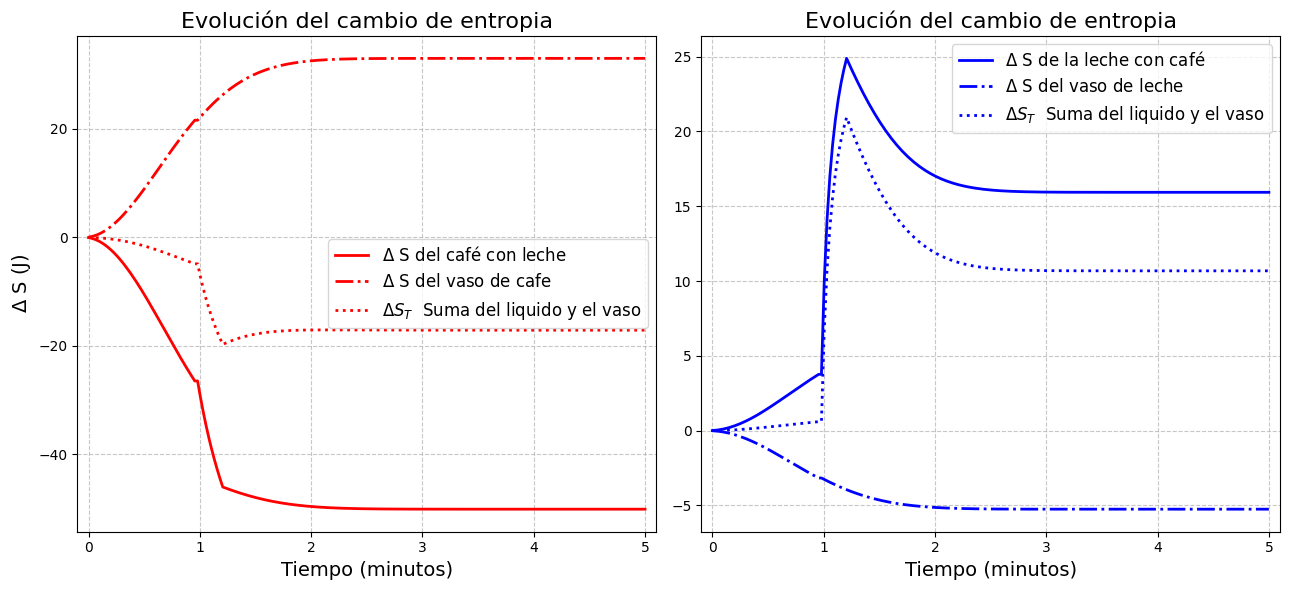

In [67]:
# Crear la figura y los ejes
fig, ax = plt.subplots(1,2,figsize=(13, 6))

# Graficar las series de datos
ax[0].plot(tiempo,ds_mezcla_cafe[:-8], color='red', label='$\Delta$ S del café con leche', linewidth=2)
ax[0].plot(tiempo, ds_vaso_cafe, color = 'red', linestyle='-.', label='$\Delta$ S del vaso de cafe', linewidth=2)
ax[0].plot(tiempo, ds_T_cafe, color = 'red', linestyle=':', label='$\Delta S_{T}$  Suma del liquido y el vaso', linewidth=2)
ax[1].plot(tiempo,ds_mezcla_leche[:-8], color='blue', label='$\Delta$ S de la leche con café', linewidth=2)
ax[1].plot(tiempo, ds_vaso_leche, color = 'blue', linestyle='-.', label='$\Delta$ S del vaso de leche', linewidth=2)
ax[1].plot(tiempo, ds_T_leche, color = 'blue', linestyle=':', label='$\Delta S_{T}$  Suma del liquido y el vaso', linewidth=2)

# Etiquetas de los ejes
ax[0].set_xlabel('Tiempo (minutos)', fontsize=14)
ax[1].set_xlabel('Tiempo (minutos)', fontsize=14)
ax[0].set_ylabel('$\Delta$ S (J)', fontsize=14)

# Límites de los ejes
ax[0].set_xlim(-0.1, 5.1)
ax[1].set_xlim(-0.1, 5.1)

# Título del gráfico
ax[0].set_title('Evolución del cambio de entropia', fontsize=16)
ax[1].set_title('Evolución del cambio de entropia', fontsize=16)

# Mostrar la leyenda
ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)

# Personalizar la cuadrícula
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[1].grid(True, linestyle='--', alpha=0.7)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

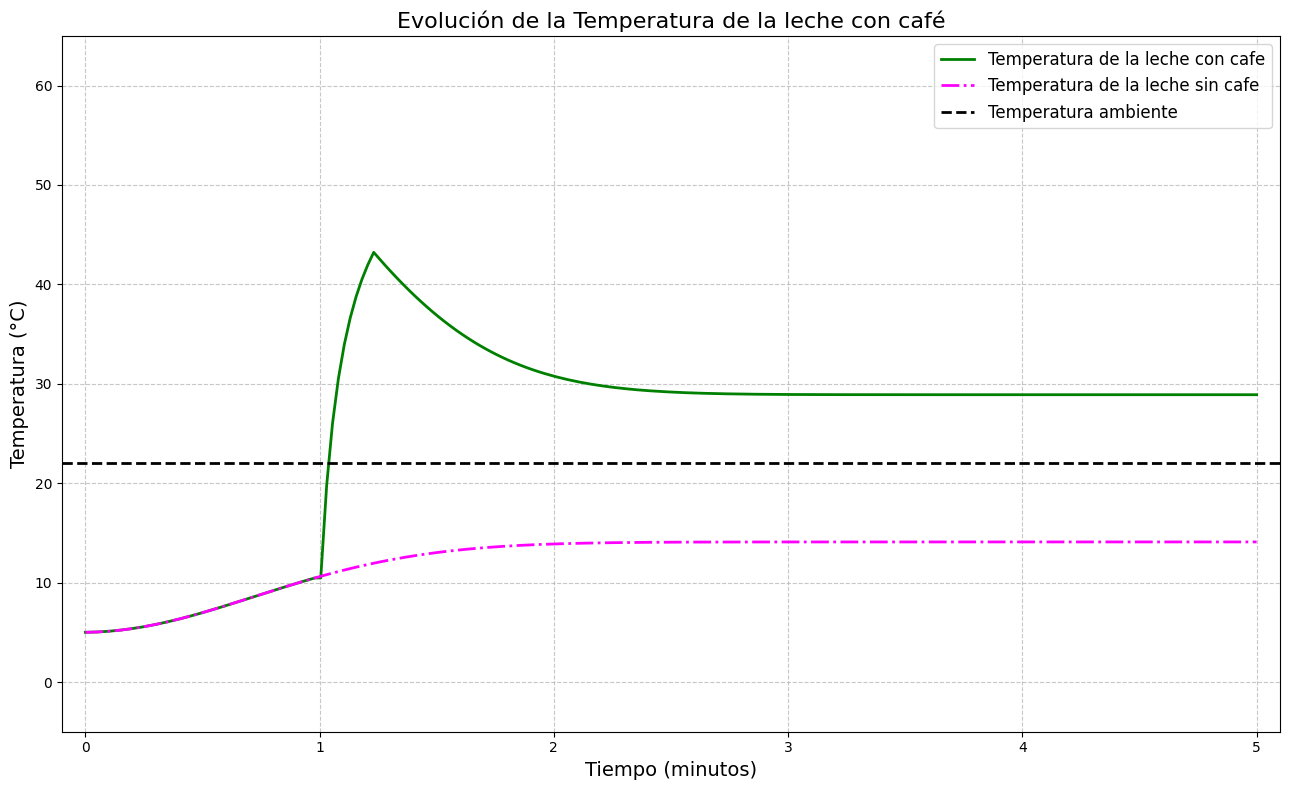

In [68]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(13, 8))

# Graficar las series de datos
ax.plot(tiempo, leche_con_cafe[:-9], color = 'green', label = 'Temperatura de la leche con cafe', linewidth=2)
ax.plot(tiempo, T_leche, color='magenta', linestyle='-.', label='Temperatura de la leche sin cafe', linewidth=2)

# Agregar una línea horizontal para la temperatura ambiente
ax.axhline(T_ambiente, color='black', linestyle='--', label='Temperatura ambiente', linewidth=2)

# Etiquetas de los ejes
ax.set_xlabel('Tiempo (minutos)', fontsize=14)
ax.set_ylabel('Temperatura (°C)', fontsize=14)

# Límites de los ejes
ax.set_xlim(-0.1, 5.1)
ax.set_ylim(-5, 65)

# Título del gráfico
ax.set_title('Evolución de la Temperatura de la leche con café', fontsize=16)

# Mostrar la leyenda
ax.legend(fontsize=12)

# Personalizar la cuadrícula
ax.grid(True, linestyle='--', alpha=0.7)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

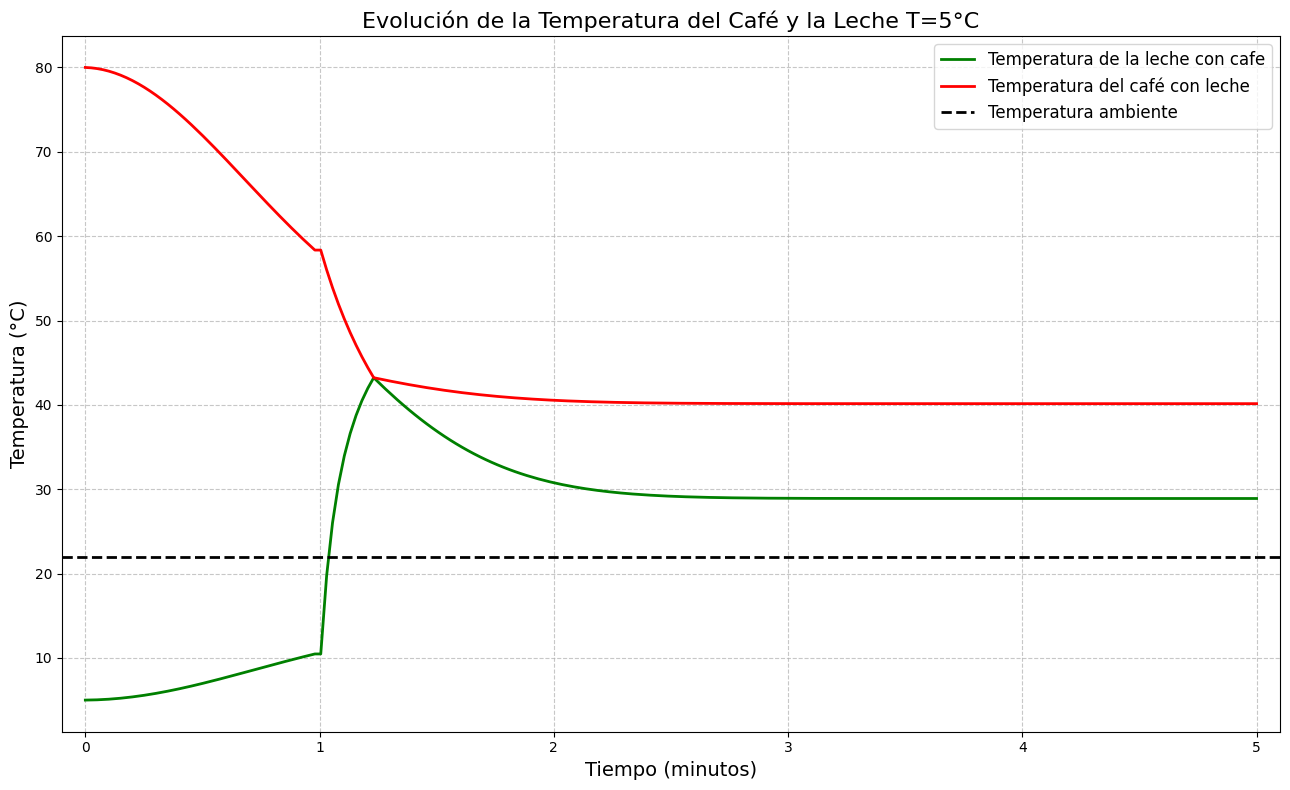

In [69]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(13, 8))

# Graficar las series de datos
ax.plot(tiempo, leche_con_cafe[:-9], color = 'green', label = 'Temperatura de la leche con cafe', linewidth=2)
ax.plot(tiempo, cafe_con_leche[:-9], color='red', label='Temperatura del café con leche', linewidth=2)

# Agregar una línea horizontal para la temperatura ambiente
ax.axhline(T_ambiente, color='black', linestyle='--', label='Temperatura ambiente', linewidth=2)

# Etiquetas de los ejes
ax.set_xlabel('Tiempo (minutos)', fontsize=14)
ax.set_ylabel('Temperatura (°C)', fontsize=14)

# Límites de los ejes
ax.set_xlim(-0.1, 5.1)


# Título del gráfico
ax.set_title('Evolución de la Temperatura del Café y la Leche T=5°C', fontsize=16)

# Mostrar la leyenda
ax.legend(fontsize=12)

# Personalizar la cuadrícula
ax.grid(True, linestyle='--', alpha=0.7)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

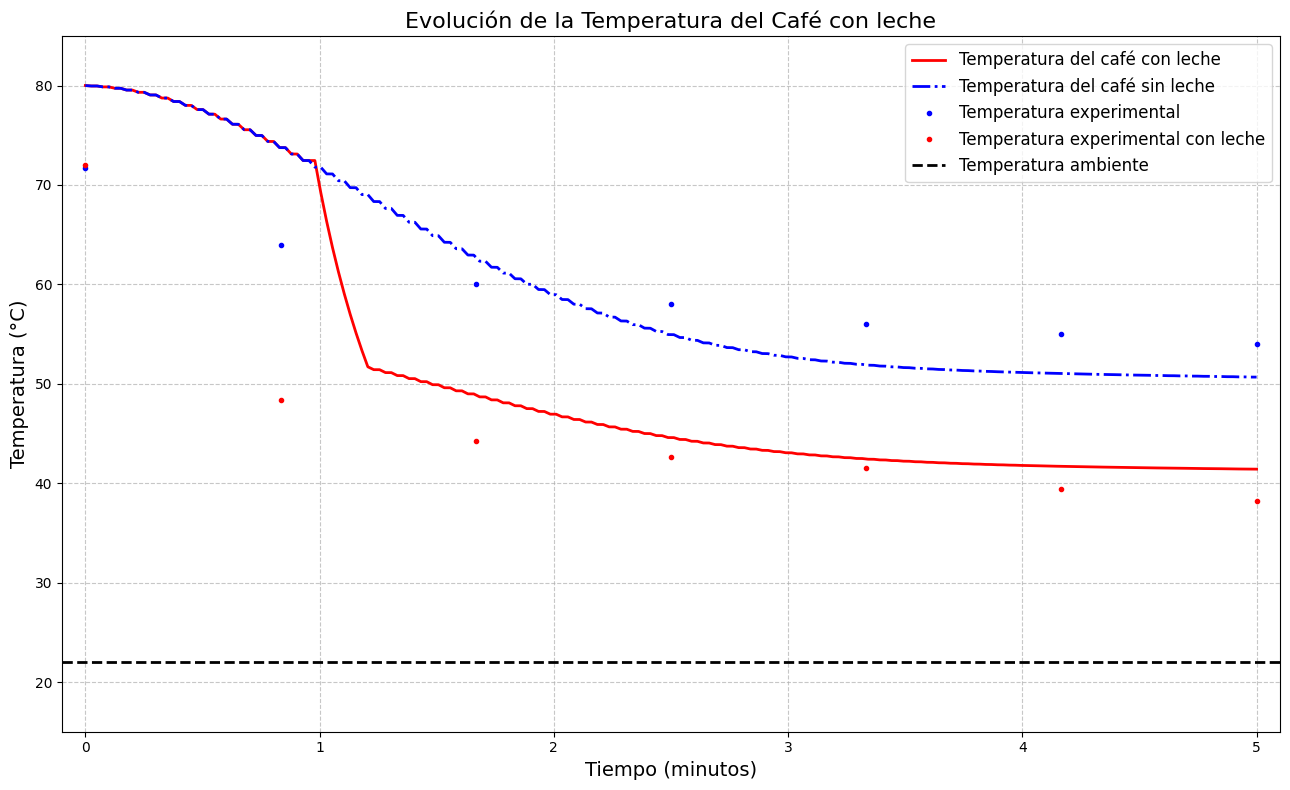

In [70]:
T_cafe = []
T_leche = []
T_mezcla_en_vaso_cafe = []
T_mezcla_en_vaso_leche = []
T_vaso_cafe = []
T_vaso_leche = []
T_vaso_cafe_o = []
T_vaso_leche_o = []
ds_cafe = []
ds_leche = []
ds_mecla_cafe = []
ds_mezcla_leche = []
ds_vaso_cafe = []
ds_vaso_leche = []
T_cafe.append(T_cafe_inicial)
T_leche.append(T_leche_inicial)
T_vaso_cafe.append(T_ambiente)
T_vaso_leche.append(T_ambiente)

for t in tiempo[1:(len(tiempo)//10)]:
    T_cafe.append(Nwt_cooling(T_cafe[-1], T_vaso_cafe[-1], t, tau=-(1)/(32)))
    T_leche.append(Nwt_cooling(T_leche[-1], T_vaso_leche[-1], t, tau=-(1)/(40)))
    T_vaso_cafe.append(Nwt_cooling(T_vaso_cafe[-1], T_cafe[-1], t, tau=-(1)/(30)))
    T_vaso_leche.append(Nwt_cooling(T_vaso_leche[-1], T_leche[-1], t, tau=-(1)/(30)))
    T_cafe.append(Nwt_cooling(T_cafe[-1], T_ambiente, t, tau=-(1)/(4000)))
    T_leche.append(Nwt_cooling(T_leche[-1], T_ambiente, t, tau=-(1)/(4000)))
    T_vaso_cafe.append(Nwt_cooling(T_vaso_cafe[-1], T_ambiente, t, tau=-(1)/(4000)))
    T_vaso_leche.append(Nwt_cooling(T_vaso_leche[-1], T_ambiente, t, tau=-(1)/(4000)))
    ds_cafe.append(cambio_entropia(m_cafe, c_cafe, T_cafe_inicial, T_cafe[-1]))
    ds_leche.append(cambio_entropia(m_leche, c_leche, T_leche_inicial, T_leche[-1]))
    ds_vaso_cafe.append(cambio_entropia(m_cafe, c_cafe, T_vaso_inicial, T_vaso_cafe[-1]))
    ds_vaso_leche.append(cambio_entropia(m_leche, c_leche, T_vaso_inicial, T_vaso_leche[-1]))

# Ley de mezclas de Richman
for m_cafe in m_cafe_a:
    T_mezcla_en_vaso_leche.append(T_Rich(T_cafe[-1], T_leche[-1], m_cafe, m_leche, c_cafe, c_leche))
    ds_mezcla_leche.append(cambio_entropia(m_leche, c_leche, T_leche_inicial, T_mezcla_en_vaso_leche[-1]))

for m_leche in m_leche_a:
    T_mezcla_en_vaso_cafe.append(T_Rich(T_cafe[-1], T_leche[-1], m_cafe, m_leche, c_cafe, c_leche))
    ds_mecla_cafe.append(cambio_entropia(m_cafe, c_cafe, T_cafe_inicial, T_mezcla_en_vaso_cafe[-1]))

T_vaso_cafe_o.append(T_vaso_cafe[-1])
T_vaso_leche_o.append(T_vaso_leche[-1])
ds_vaso_cafe.append(cambio_entropia(m_cafe, c_cafe, T_vaso_inicial, T_vaso_cafe_o[-1]))
ds_vaso_leche.append(cambio_entropia(m_leche, c_leche, T_vaso_inicial, T_vaso_leche_o[-1]))

for t in tiempo[(len(tiempo)//10):-1]:
    T_mezcla_en_vaso_cafe.append(Nwt_cooling(T_mezcla_en_vaso_cafe[-1], T_vaso_cafe[-1], t, tau=-(1)/(38)))
    T_mezcla_en_vaso_leche.append(Nwt_cooling(T_mezcla_en_vaso_leche[-1], T_vaso_leche[-1], t, tau=-(1)/(38)))
    T_vaso_cafe.append(Nwt_cooling(T_vaso_cafe[-1], T_mezcla_en_vaso_cafe[-1], t, tau=-(1)/(30)))
    T_vaso_leche.append(Nwt_cooling(T_vaso_leche[-1], T_mezcla_en_vaso_leche[-1], t, tau=-(1)/(30)))
    T_mezcla_en_vaso_cafe.append(Nwt_cooling(T_mezcla_en_vaso_cafe[-1], T_ambiente, t, tau=-(1)/(4000)))
    T_mezcla_en_vaso_leche.append(Nwt_cooling(T_mezcla_en_vaso_leche[-1], T_ambiente, t, tau=-(1)/(4000)))
    T_vaso_cafe.append(Nwt_cooling(T_vaso_cafe[-1], T_ambiente, t, tau=-(1)/(4000)))
    T_vaso_leche.append(Nwt_cooling(T_vaso_leche[-1], T_ambiente, t, tau=-(1)/(4000)))
    ds_mezcla_leche.append(cambio_entropia(m_leche, c_leche, T_leche_inicial, T_mezcla_en_vaso_leche[-1]))
    ds_mecla_cafe.append(cambio_entropia(m_cafe, c_cafe, T_cafe_inicial, T_mezcla_en_vaso_cafe[-1]))


for t in tiempo[(len(tiempo)//10):]:
    T_cafe.append(Nwt_cooling(T_cafe[-1], T_vaso_cafe_o[-1], t, tau=-(1)/(32)))
    T_leche.append(Nwt_cooling(T_leche[-1], T_vaso_leche_o[-1], t, tau=-(1)/(40)))
    T_vaso_cafe_o.append(Nwt_cooling(T_vaso_cafe_o[-1], T_cafe[-1], t, tau=-(1)/(30)))
    T_vaso_leche_o.append(Nwt_cooling(T_vaso_leche_o[-1], T_leche[-1], t, tau=-(1)/(30)))
    T_cafe.append(Nwt_cooling(T_cafe[-1], T_ambiente, t, tau=-(1)/(4000)))
    T_leche.append(Nwt_cooling(T_leche[-1], T_ambiente, t, tau=-(1)/(4000)))
    T_vaso_cafe_o.append(Nwt_cooling(T_vaso_cafe_o[-1], T_ambiente, t, tau=-(1)/(4000)))
    T_vaso_leche_o.append(Nwt_cooling(T_vaso_leche_o[-1], T_ambiente, t, tau=-(1)/(4000)))
    ds_cafe.append(cambio_entropia(m_cafe, c_cafe, T_cafe_inicial, T_cafe[-1]))
    ds_leche.append(cambio_entropia(m_leche, c_leche, T_leche_inicial, T_leche[-1]))
    ds_vaso_cafe.append(cambio_entropia(m_cafe, c_cafe, T_vaso_inicial, T_vaso_cafe_o[-1]))
    ds_vaso_leche.append(cambio_entropia(m_leche, c_leche, T_vaso_inicial, T_vaso_leche_o[-1]))

cafe_con_leche = T_cafe[:(len(T_cafe)//10)] + T_mezcla_en_vaso_cafe # 207 - 199
leche_con_cafe = T_leche[:(len(T_leche)//10)] + T_mezcla_en_vaso_leche
ds_mezcla_cafe = ds_cafe[:(len(ds_cafe)//10)] + ds_mecla_cafe
ds_mezcla_leche = ds_leche[:(len(ds_leche)//10)] + ds_mezcla_leche
ds_T_cafe = [x + y for x, y in zip(ds_mezcla_cafe, ds_vaso_cafe)]
ds_T_leche = [x + y for x, y in zip(ds_mezcla_leche, ds_vaso_leche)]


# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(13, 8))

# Graficar las series de datos
ax.plot(tiempo, cafe_con_leche[:-207], color='red', label='Temperatura del café con leche', linewidth=2)
ax.plot(tiempo, T_cafe[:-199], color='blue', linestyle='-.', label='Temperatura del café sin leche', linewidth=2)
ax.plot(exp_time, exp_T, color='blue', label='Temperatura experimental', linewidth=2,  marker='.', linestyle='')
ax.plot(exp_time, exp_T_leche, color='red', label='Temperatura experimental con leche', linewidth=2, marker='.', linestyle='')

# Agregar una línea horizontal para la temperatura ambiente
ax.axhline(T_ambiente, color='black', linestyle='--', label='Temperatura ambiente', linewidth=2)

# Etiquetas de los ejes
ax.set_xlabel('Tiempo (minutos)', fontsize=14)
ax.set_ylabel('Temperatura (°C)', fontsize=14)

# Límites de los ejes
ax.set_xlim(-0.1, 5.1)
ax.set_ylim(15, 85)


# Título del gráfico
ax.set_title('Evolución de la Temperatura del Café con leche', fontsize=16)

# Mostrar la leyenda
ax.legend(fontsize=12)

# Personalizar la cuadrícula
ax.grid(True, linestyle='--', alpha=0.7)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

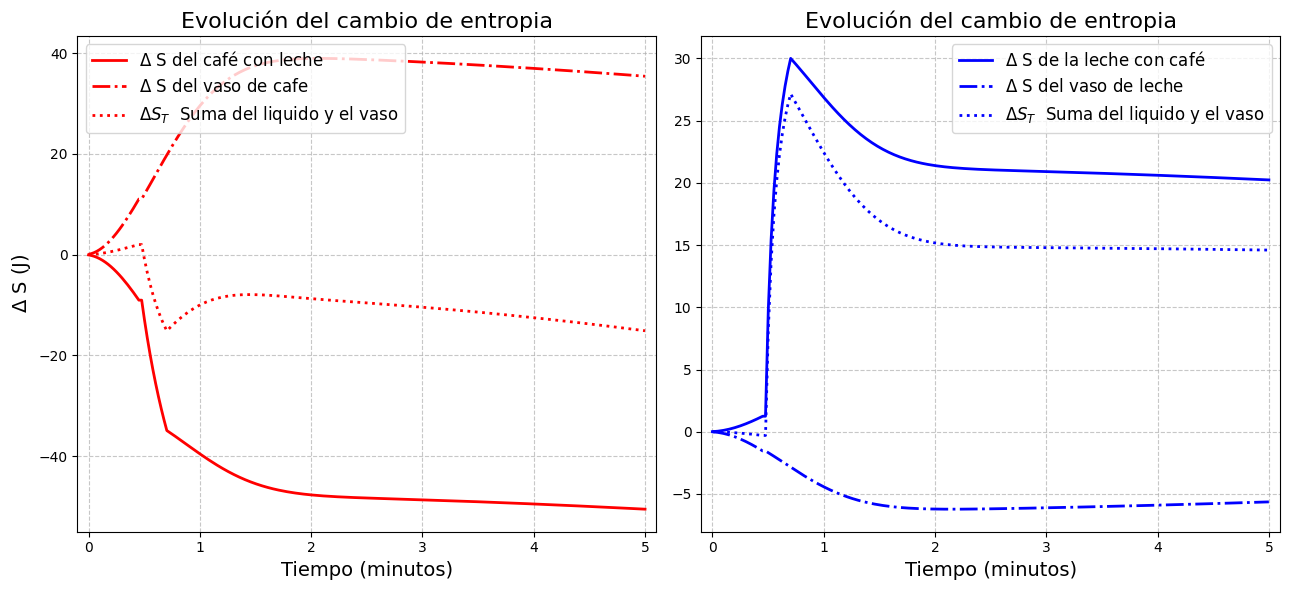

In [71]:
# Crear la figura y los ejes
fig, ax = plt.subplots(1,2,figsize=(13, 6))

# Graficar las series de datos
ax[0].plot(tiempo,ds_mezcla_cafe[:-8], color='red', label='$\Delta$ S del café con leche', linewidth=2)
ax[0].plot(tiempo, ds_vaso_cafe, color = 'red', linestyle='-.', label='$\Delta$ S del vaso de cafe', linewidth=2)
ax[0].plot(tiempo, ds_T_cafe, color = 'red', linestyle=':', label='$\Delta S_{T}$  Suma del liquido y el vaso', linewidth=2)
ax[1].plot(tiempo,ds_mezcla_leche[:-8], color='blue', label='$\Delta$ S de la leche con café', linewidth=2)
ax[1].plot(tiempo, ds_vaso_leche, color = 'blue', linestyle='-.', label='$\Delta$ S del vaso de leche', linewidth=2)
ax[1].plot(tiempo, ds_T_leche, color = 'blue', linestyle=':', label='$\Delta S_{T}$  Suma del liquido y el vaso', linewidth=2)

# Etiquetas de los ejes
ax[0].set_xlabel('Tiempo (minutos)', fontsize=14)
ax[1].set_xlabel('Tiempo (minutos)', fontsize=14)
ax[0].set_ylabel('$\Delta$ S (J)', fontsize=14)

# Límites de los ejes
ax[0].set_xlim(-0.1, 5.1)
ax[1].set_xlim(-0.1, 5.1)

# Título del gráfico
ax[0].set_title('Evolución del cambio de entropia', fontsize=16)
ax[1].set_title('Evolución del cambio de entropia', fontsize=16)

# Mostrar la leyenda
ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)

# Personalizar la cuadrícula
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[1].grid(True, linestyle='--', alpha=0.7)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

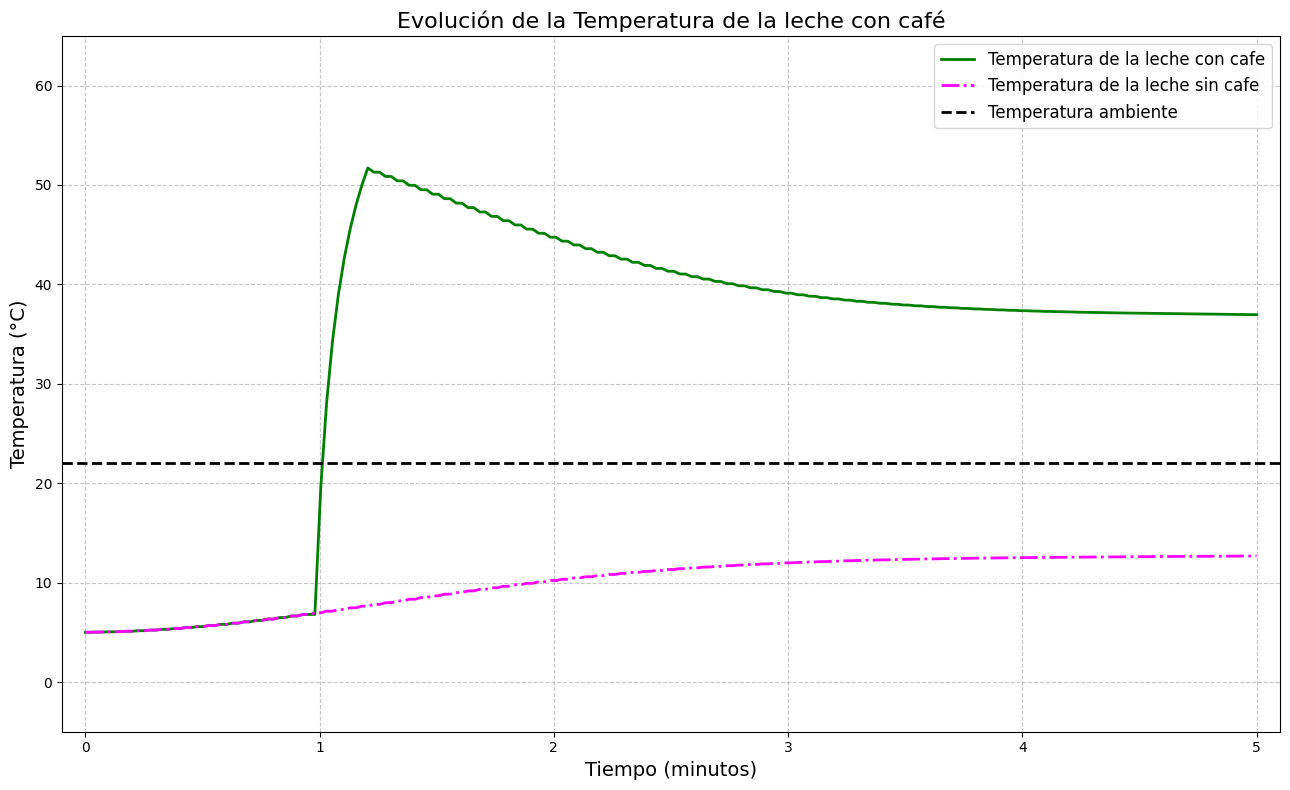

In [72]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(13, 8))

# Graficar las series de datos
ax.plot(tiempo, leche_con_cafe[:-207], color = 'green', label = 'Temperatura de la leche con cafe', linewidth=2)
ax.plot(tiempo, T_leche[:-199], color='magenta', linestyle='-.', label='Temperatura de la leche sin cafe', linewidth=2)

# Agregar una línea horizontal para la temperatura ambiente
ax.axhline(T_ambiente, color='black', linestyle='--', label='Temperatura ambiente', linewidth=2)

# Etiquetas de los ejes
ax.set_xlabel('Tiempo (minutos)', fontsize=14)
ax.set_ylabel('Temperatura (°C)', fontsize=14)

# Límites de los ejes
ax.set_xlim(-0.1, 5.1)
ax.set_ylim(-5, 65)

# Título del gráfico
ax.set_title('Evolución de la Temperatura de la leche con café', fontsize=16)

# Mostrar la leyenda
ax.legend(fontsize=12)

# Personalizar la cuadrícula
ax.grid(True, linestyle='--', alpha=0.7)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

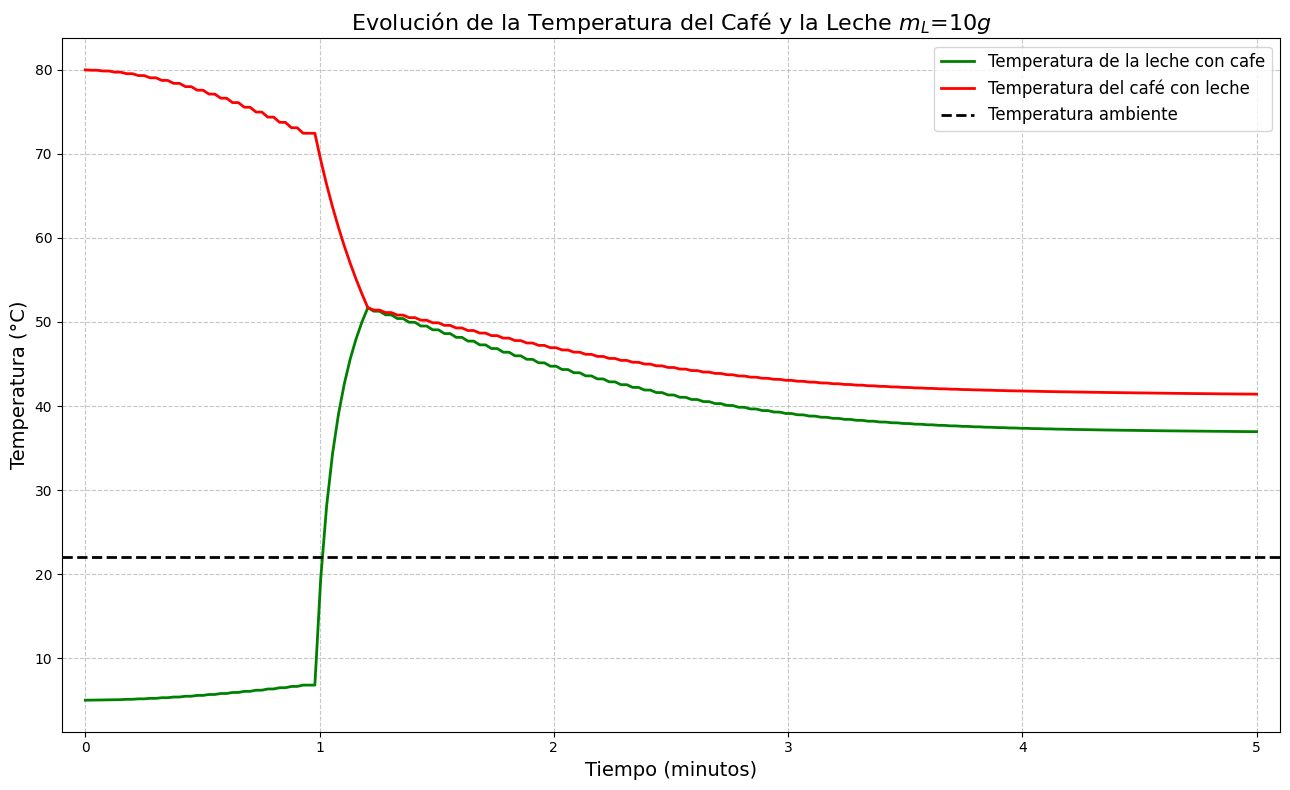

In [73]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(13, 8))

# Graficar las series de datos
ax.plot(tiempo, leche_con_cafe[:-207], color = 'green', label = 'Temperatura de la leche con cafe', linewidth=2)
ax.plot(tiempo, cafe_con_leche[:-207], color='red', label='Temperatura del café con leche', linewidth=2)

# Agregar una línea horizontal para la temperatura ambiente
ax.axhline(T_ambiente, color='black', linestyle='--', label='Temperatura ambiente', linewidth=2)

# Etiquetas de los ejes
ax.set_xlabel('Tiempo (minutos)', fontsize=14)
ax.set_ylabel('Temperatura (°C)', fontsize=14)

# Límites de los ejes
ax.set_xlim(-0.1, 5.1)

# Título del gráfico
ax.set_title('Evolución de la Temperatura del Café y la Leche $m_{L}$=10$g$', fontsize=16)

# Mostrar la leyenda
ax.legend(fontsize=12)

# Personalizar la cuadrícula
ax.grid(True, linestyle='--', alpha=0.7)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()